<a href="https://colab.research.google.com/github/gabiacuna/KL2021/blob/main/Analisis%20de%20Imagenes%20con%20DL/003-Entrenando-Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Construyendo una red neural en Pytorch

Pytorch es una excelente herramienta para crear y entrenar modelos con diferentes arquitecturas.
Por lo mismo, antes de que se desarrollara Pytorch, un podía construir redes neurales con simplemente
paquetes básicos como `Numpy` y `math`.

En la siguiente sección, veremos como desarrollar una red neural simple con los simples paquetes de Python.

## Ejemplo de red neural con simplemente usando `Numpy` y Pytorch

Podemos entrenar un modelo simple con la función:

$$y = a + bx$$

Esta función consta de 3 inputs, y nosotros queremos utilizar `Numpy` para encontrar la relación entre
`x` e `y` utilizando la función de arriba.

Para empezar, importamos nuestros módulos y creamos data aleatorea con cierto ruido:

In [1]:
# Módulos
%matplotlib inline
import numpy as np
import math
from sklearn import datasets
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

random_state = 20   #Se inicializa un estado aleatorio

Y antes de cualquier cosa, inicializamos la semilla aleatorea:

In [2]:
np.random.seed(random_state)

Y ahora creamos una data aleatoria para el *input* y *output* del modelo:

In [3]:
# Definimos los parámetros
a_original = 10
b_original = 0.5

# Y luego creamos la data
X_numpy = np.linspace(-10, 10, 2000)    #Observaciones verdaderas que tenemos.
y_numpy = a_original + b_original * X_numpy

In [ ]:
#X_numpy, y_numpy, coef = datasets.make_regression(n_samples=1000, n_features=1, noise=5, random_state=random_state, coef=True)

Y podemos ver esta data:

Text(0, 0.5, 'Y')

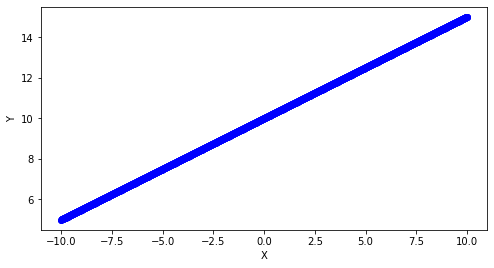

In [4]:
fig = plt.figure(figsize=(8,8), facecolor="white")
ax = fig.add_subplot(111)
ax.scatter(X_numpy, y_numpy, c="blue")
ax.set_aspect('equal')
ax.set_xlabel("X")
ax.set_ylabel("Y")

Lo que queremos lograr es que nuestro modelo pueda aprender la relación de la data y ver que tan bién puede
representar la función lineal de esta data. Los pasos a seguir son los siguientes:

1. Inicializar la pesas aleatoreamente
2. Especificar parámetros como la *velocidad de aprendizaje* (learning rate) del modelo, el número de épocas, etc.
3. Calcular la predicción del modelo
4. Comparar con la verdad y calcular la función de pérdida
5. Empezar con el "backpropagation", i.e. calculando las derivadas de la función de perdida con respecto a los coeficientes de la función.
6. Modificar las pesas y empezar de nuevo

In [73]:
# Inicializando pesas aleatoreas
a_weight = np.random.randn()
b_weight = np.random.randn()

print(f">>> a: `{a_weight}` | b: `{b_weight}`")

>>> a: `-0.885493154616703` | b: `-1.1045794834534277`


Luego el valor de la velocidad de aprendizaje (learning rate) y el número de épocas:

Learning rate nos dice que tan grande o pequeño es el salto entre un punto y otro. Mientras mas pequeño, mas va a tardar, pero será más preciso. 

Una epoca es una pasada del principio al final de la red. Y modificamos la cantidad de epocas. 

In [72]:
# Learning rate
learning_rate = 1e-6

# Número de épocas:
n_epoch = 100000

Y ahora estamos listos para empezar con el entrenamiento del modelo:

In [20]:
# epoch_ii = 0
# a_weight + b_weight * X_numpy

In [45]:
y_numpy

array([ 5.       ,  5.0050025,  5.010005 , ..., 14.989995 , 14.9949975,
       15.       ])

En la primera pasada los resultados son muy diferentes, ya que los pesos parten randoms

In [76]:
# Iterando sobre cada época
for epoch_ii in range(n_epoch):
    # Iniciamos con el "forward pass" para predecir `y_pred`
    y_pred = a_weight + b_weight * X_numpy
    
    # Luego calculamos la función de pérdida
    # En este caso, la definimos como SUM[(y_pred - y_true)^2]
    # Esta función es la que se tratará de minimizar en cada iteración
    loss_val = np.sum(np.square(y_pred - y_numpy))
    #
    if epoch_ii % 10000 == 0:
        print("Epoch: {0} | Loss: {1}".format(epoch_ii, loss_val))
    
    # Y ahora podemos ajustar las pesas con respecto a la función de pérdida
    # Esto es lo mismo que:
    #     d(loss)/d(y_pred) = d((y_pred - y_true)^2) = 2 * (y_pred - y)
    grad_y_pred = 2 * (y_pred - y_numpy)    #Derivadaaa :3
    # Y ahora calculamos la derivada de las variables referente a la función de pérdida
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * X_numpy).sum()
    
    # Y por último podemos ahora actualizar las pesas y empezar de nuevo
    a_weight -= learning_rate * grad_a
    b_weight -= learning_rate * grad_b

Epoch: 0 | Loss: 9.70477882295412e-23
Epoch: 10000 | Loss: 9.70477882295412e-23
Epoch: 20000 | Loss: 9.70477882295412e-23
Epoch: 30000 | Loss: 9.70477882295412e-23
Epoch: 40000 | Loss: 9.70477882295412e-23
Epoch: 50000 | Loss: 9.70477882295412e-23
Epoch: 60000 | Loss: 9.70477882295412e-23
Epoch: 70000 | Loss: 9.70477882295412e-23
Epoch: 80000 | Loss: 9.70477882295412e-23
Epoch: 90000 | Loss: 9.70477882295412e-23


Se puede definir un numero fijo de epocas. O se pude correr hasta que la loss function llegue a un tope.

Y ahora podemos visualizar la comparar los valores que obtuvimos con los que
son en realidad los valores correctos:

In [77]:
# Ya que ha terminado de aprender este "modelo", podemos verificar los
# resultados:

print(f">>> Predicción: y = {a_weight} + {b_weight} x")
print(f">>> Realidad  : y = {a_original} + {b_original} x")

>>> Predicción: y = 9.99999999999978 + 0.4999999999999999 x
>>> Realidad  : y = 10 + 0.5 x


Esto muestra que uno puede utilizar estos simples métodos para encontrar los coeficientes
de una función, que en este caso es linear.

### Mismo modelo pero en Pytorch

Ahora podemos hacer el mismo procedimiento, pero utilizando Pytorch para esto:

In [78]:
# Inicializamos los tensores de entrada y salida
X_tensor = torch.from_numpy(X_numpy.astype(np.float32))
y_tensor = torch.from_numpy(y_numpy.astype(np.float32))

# Y modificamos la forma de `y_tensor`
X_tensor = X_tensor.view(y_tensor.shape[0], 1)
y_tensor = y_tensor.view(y_tensor.shape[0], 1)

In [79]:
print(X_tensor)

tensor([[-10.0000],
        [ -9.9900],
        [ -9.9800],
        ...,
        [  9.9800],
        [  9.9900],
        [ 10.0000]])


In [80]:
print(y_tensor)

tensor([[ 5.0000],
        [ 5.0050],
        [ 5.0100],
        ...,
        [14.9900],
        [14.9950],
        [15.0000]])


Ahora podemos definir las variables de elementos y de "features":

In [81]:
n_samples, n_features = X_tensor.shape

print(f"Número of elementos: {n_samples} | Número de features: {n_features}")

Número of elementos: 2000 | Número de features: 1


Lo siguientes pasos son para:

1. Crear el modelo lineal
2. Definir los parámetros y criterios
3. Utilizar un optimizador
4. Y por último, entrenar el modelo por un cierto número de épocas

pytorch hace la loss func, y la inicializacion de las pesas. Tambien el back propagation.

#### Modelo

El modelo es un modelo lineal:

In [83]:
# Modelo linear: f = wx + b
input_size = n_features
output_size = 1

# Definimos el modelo acá
model = nn.Linear(input_size, output_size)  #Se pueden definir otro tipo de modelos

#### Parámetros del modelo

En esta parte, decidimos cuáles son los valores de los hyper-parámetros del modelo:

In [92]:
# Velocidad de aprendizaje
learning_rate = 0.01

# Función de pérdida
criterion = nn.MSELoss()    #Este es el Mean square error

# Optimizador
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)   #Decimos que queremos optimizar los paramnetros del modelo

[MSEloss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html)

#### Entrenar el modelo

Ya por último, vamos a entrenar el modelo:

In [102]:
def entrenar_modelo(lr=0.1, num_epochs=100):
    # Función de pérdida
    criterion = nn.MSELoss()    #Este es el Mean square error

    # Optimizador
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)   #Decimos que queremos optimizar los paramnetros del modelo
    
    predictions_arr = []
    for epoch in range(num_epochs):
        # Forward pass and loss
        y_predicted = model(X_tensor)
        loss = criterion(y_predicted, y_tensor)
        
        # Backward pass and update
        loss.backward()
        optimizer.step()

        # zero grad before new step
        optimizer.zero_grad()

        if (epoch+1) % 15 == 0:
            print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
            predicted = model(X_tensor).detach().numpy()

            predictions_arr.append((X_tensor.numpy(), predicted))
    return predictions_arr

In [103]:
y_test = entrenar_modelo(lr=0.1, num_epochs=100)

epoch: 15, loss = 0.0000
epoch: 30, loss = 0.0000
epoch: 45, loss = 0.0000
epoch: 60, loss = 0.0000
epoch: 75, loss = 0.0000
epoch: 90, loss = 0.0000


#### Verificación de los datos

Es en esta parte donde podemos ver que tan bién se ejecutó el entrenamiento del modelo:

In [87]:
y_tensor

tensor([[ 5.0000],
        [ 5.0050],
        [ 5.0100],
        ...,
        [14.9900],
        [14.9950],
        [15.0000]])

In [104]:
model(X_tensor).detach()

tensor([[ 5.0000],
        [ 5.0050],
        [ 5.0100],
        ...,
        [14.9900],
        [14.9950],
        [15.0000]])

In [95]:
# Plot
predicted = model(X_tensor).detach().numpy()

predicted

array([[ 4.980981 ],
       [ 4.9859834],
       [ 4.990986 ],
       ...,
       [14.970976 ],
       [14.975979 ],
       [14.980981 ]], dtype=float32)

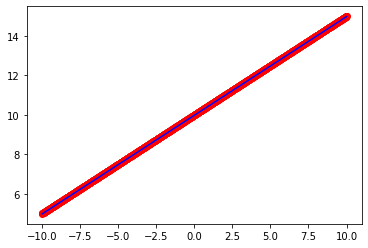

In [96]:
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()